In [3]:
import numpy as np
import pandas as pd
from logistic_regression import LogisticRegression

In [4]:
iris_data_loc = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(iris_data_loc, header=None, encoding='utf-8')

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [5]:
from sklearn import model_selection


df['setosa'] = (df[4] == 'Iris-setosa').astype(int)
print(df.info())
X = df.iloc[:, 0:3]
y = df.iloc[:, 5]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(X_test.shape, X_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
 4   4       150 non-null    object 
 5   setosa  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
(30, 3) (120, 3)


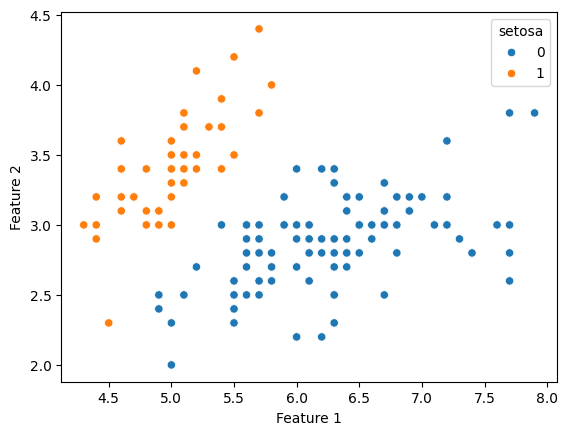

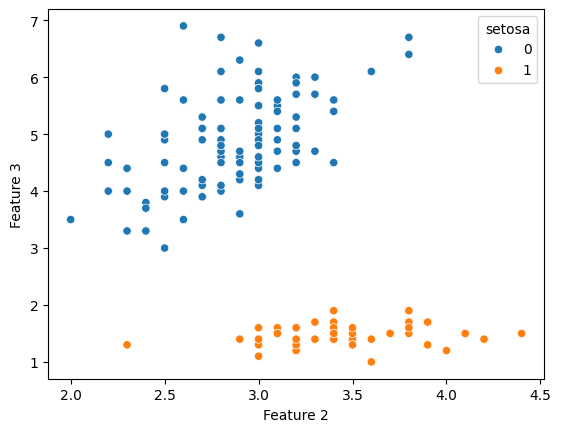

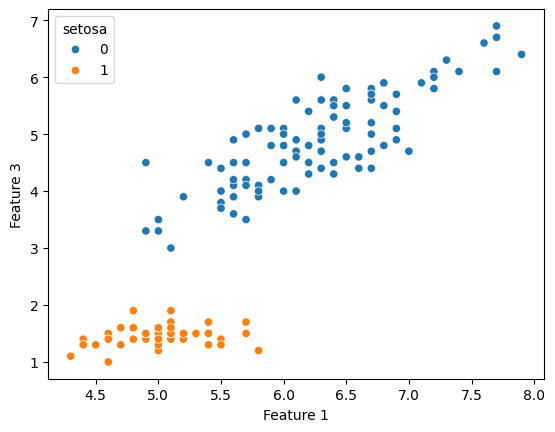

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x=0, y=1, hue='setosa', markers='setosa')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

sns.scatterplot(data=df, x=1, y=2, hue='setosa', markers='setosa')
plt.xlabel("Feature 2")
plt.ylabel("Feature 3")
plt.show()

sns.scatterplot(data=df, x=0, y=2, hue='setosa', markers='setosa')
plt.xlabel("Feature 1")
plt.ylabel("Feature 3")
plt.show()

In [7]:
logist = LogisticRegression()
logist.fit(X_train, y_train)

In [9]:
predictions_logist = logist.predict(X_test)
print(f"Prediction success rate is {np.sum(predictions_logist == y_test)/len(y_test) * 100} %")

Prediction success rate is 96.66666666666667 %


In [11]:
# With the standardized datasets
X_std = pd.DataFrame()
for i in range(3):
    X_std[i] = (X[i] - X[i].mean()) / X[i].std()

X_std_train, X_std_test, y_std_train, y_std_test = model_selection.train_test_split(X_std, y, stratify=y, test_size=0.2, random_state=42)# With the standardized datasets
X_std = pd.DataFrame()
for i in range(3):
    X_std[i] = (X[i] - X[i].mean()) / X[i].std()

X_std_train, X_std_test, y_std_train, y_std_test = model_selection.train_test_split(X_std, y, stratify=y, test_size=0.2, random_state=42)

In [13]:
logist_std = LogisticRegression()
logist_std.fit(X_std_train, y_std_train)

predictions_logist_std = logist.predict(X_std_test)
print(f"Prediction success rate is {np.sum(predictions_logist_std == y_std_test)/len(y_std_test) * 100} %")

Prediction success rate is 96.66666666666667 %


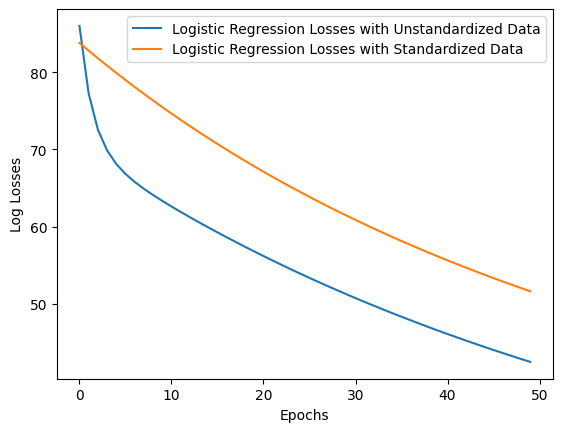

In [15]:
sns.lineplot(y=logist.losses_, x=np.arange(logist.epochs), markers='o', markersize=10, label='Logistic Regression Losses with Unstandardized Data')
sns.lineplot(y=logist_std.losses_, x=np.arange(logist_std.epochs), markers='o', markersize=10, label='Logistic Regression Losses with Standardized Data')
plt.xlabel('Epochs')
plt.ylabel('Log Losses')
plt.title
plt.show()

In [18]:
logist_sgd = LogisticRegression()
logist_sgd.fit(X_std_train, y_std_train, sgd=True, batch_size=5)
predictions_logist_sgd = logist_sgd.predict(X_std_test)
print(f"Prediction success rate is {np.sum(predictions_logist_sgd == y_std_test)/len(y_std_test) * 100} %")

Prediction success rate is 100.0 %


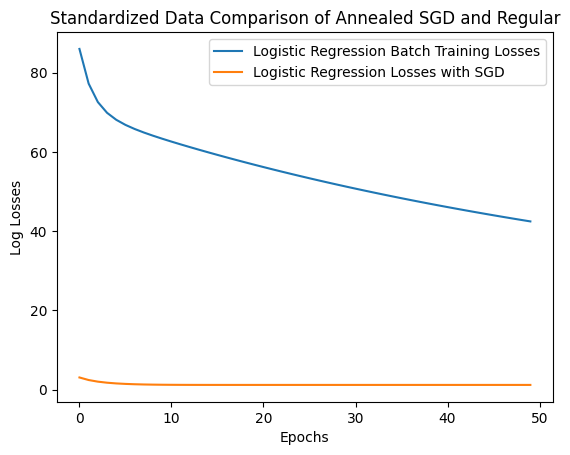

In [20]:
sns.lineplot(y=logist.losses_, x=np.arange(logist.epochs), markers='o', markersize=10, label='Logistic Regression Batch Training Losses')
sns.lineplot(y=logist_sgd.losses_, x=np.arange(logist_sgd.epochs), markers='o', markersize=10, label='Logistic Regression Losses with SGD')
plt.xlabel('Epochs')
plt.ylabel('Log Losses')
plt.title('Standardized Data Comparison of Annealed SGD and Regular')
plt.show()